<a href="https://colab.research.google.com/github/afeld/nyu-python-public-policy/blob/master/lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYU Wagner - Python Coding for Public Policy**
# Class 3 (Nov 14): Data visualization

# LECTURE

## **Today's goal**: Visualizing requests per community district to help us better understand trends across the city

## Start by importing necessary packages

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
drive.mount('/content/drive')
# follow the link it generates, choose your account, and then paste in the authorization code it provides

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Data setup to get back to where we left off last class: 
### Table (`cd_data`) of community districts with their respective 311 request counts and population data

### Create dataframe containing count of complaints per community district & create borocd column

In [5]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
cb_counts = df.groupby('community_board').size().reset_index(name='count_of_311_requests')

In [ ]:
# this function will recode the community_board value into borocd in a new column
  def recode_borocd_counts(row):
    if row.community_board[0] != 'U':
      if 'MANHATTAN' in row.community_board:
        return '1' + row.community_board[:2]
      elif 'BRONX' in row.community_board:
        return '2' + row.community_board[:2]
      elif 'BROOKLYN' in row.community_board:
        return '3' + row.community_board[:2]
      elif 'QUEENS' in row.community_board:
        return '4' + row.community_board[:2]
      elif 'STATEN ISLAND' in row.community_board:
        return '5' + row.community_board[:2]
    else:
      return 'Invalid borocd'

cb_counts['borocd'] = cb_counts.apply(recode_borocd_counts, axis=1)

### Load the dataset of population per community district & create borocd column

In [8]:
# Data source for population by Community District: https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Community-Districts/xi7c-iiu2/data
# This time we'll load it directly from NYC Open Data instead of from Google Drive
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


In [ ]:
# Create a function recode_borocd_pop that combines and recodes the Borough and CD Number values to create a borocd unique ID

def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)

In [10]:
print(population['borocd'])

0     201
1     202
2     203
3     204
4     205
5     206
6     207
7     208
8     209
9     210
10    211
11    212
12    301
13    302
14    303
15    304
16    305
17    306
18    307
19    308
20    309
21    310
22    311
23    312
24    313
25    314
26    315
27    316
28    317
29    318
30    101
31    102
32    103
33    104
34    105
35    106
36    107
37    108
38    109
39    110
40    111
41    112
42    401
43    402
44    403
45    404
46    405
47    406
48    407
49    408
50    409
51    410
52    411
53    412
54    413
55    414
56    501
57    502
58    503
Name: borocd, dtype: object


### Join the population data onto the counts data after creating shared `borocd` unique ID

In [ ]:
# now lets join this population data onto our CD dataset
# the default setting for merge is an inner join

merged_data = pd.merge(left=cb_counts, right=population, left_on='borocd', right_on='borocd')

In [12]:
# let's create a simplified new dataframe that only include the columns we care about and in a better order

cd_data = merged_data[['borocd', 'Borough', 'CD Name', '2010 Population', 'count_of_311_requests']]
cd_data.head()

,borocd,Borough,CD Name,2010 Population,count_of_311_requests
0,201,Bronx,"Melrose, Mott Haven, Port Morris",91497,27353
1,301,Brooklyn,"Williamsburg, Greenpoint",173083,68101
2,101,Manhattan,"Battery Park City, Tribeca",60978,21259
3,401,Queens,"Astoria, Long Island City",191105,60425
4,501,Staten Island,"Stapleton, Port Richmond",175756,65145


## **matplotlib**: What are the different parts of a chart? https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

Types of matplotlib plots:
- line chart: `plt.plot(x, y)`
- scatter plot: `plt.scatter(x, y)`
- bar chart: `plt.bar(x, y)` with x = list of categories for the bars
- histogram: `plt.hist(x, bins=n)` with n = number of bins

Note: x and y are both lists. They always need to be the same length.

## matplotlib prefers "arrays" (aka lists). **numpy** is a helpful package for creating arrays

In [13]:
# creates an array from a list
ex1 = np.array([200,300,100,0])

# when plotting using matplotlib, it can be beneficial to convert a pandas series into an array using np.array()
ex2= np.array(cd_data.borocd)

# creates an array starting at zero through the inputted number, helpful for creating an index
ex3 = np.arange(10)

# creates an array with a specified number of elements, spaced equally between the specified beginning and end
ex4 = np.linspace(1, 4, 6)

# creates an array of a specified size containing all the same value
ex5 = np.full(12,20000)

print('ex1: ', ex1)
print('ex2: ', ex2)
print('ex3: ', ex3)
print('ex4: ', ex4)
print('ex4: ', ex5)

ex1:  [200 300 100   0]
ex2:  ['201' '301' '101' '401' '501' '202' '302' '102' '402' '502' '203' '303'
 '103' '403' '503' '204' '304' '104' '404' '205' '305' '105' '405' '206'
 '306' '106' '406' '207' '307' '107' '407' '208' '308' '108' '408' '209'
 '309' '109' '409' '210' '310' '110' '410' '211' '311' '111' '411' '212'
 '312' '112' '412' '313' '413' '314' '414' '315' '316' '317' '318']
ex3:  [0 1 2 3 4 5 6 7 8 9]
ex4:  [1.  1.6 2.2 2.8 3.4 4. ]
ex4:  [20000 20000 20000 20000 20000 20000 20000 20000 20000 20000 20000 20000]


More info on creating arrays in numpy: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html#arrays-creatio

## Let's start with making a bar chart to better visualize the difference in scale of 311 requests across community boards


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58]


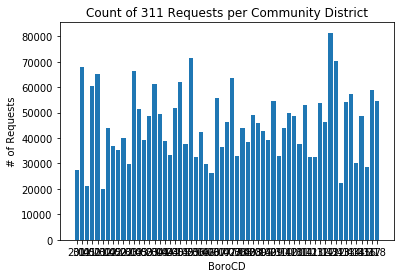

In [14]:
# create an array (essentially a list) of 0 though the length of cd_data. 
# this will be used to populate the x axis with all the ncessary bars.
position_on_x = np.arange(len(cd_data))
print(position_on_x)

# create a bar chart with x = position_on_x and y = count_of_311_requests per borocd
plt.bar(position_on_x, cd_data.count_of_311_requests, align='center')

# label each bar with its borocd value
plt.xticks(position_on_x, cd_data.borocd)

# labels for the chart title and axes
plt.title('Count of 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')

# show the plot once you've defined what it should include
plt.show()

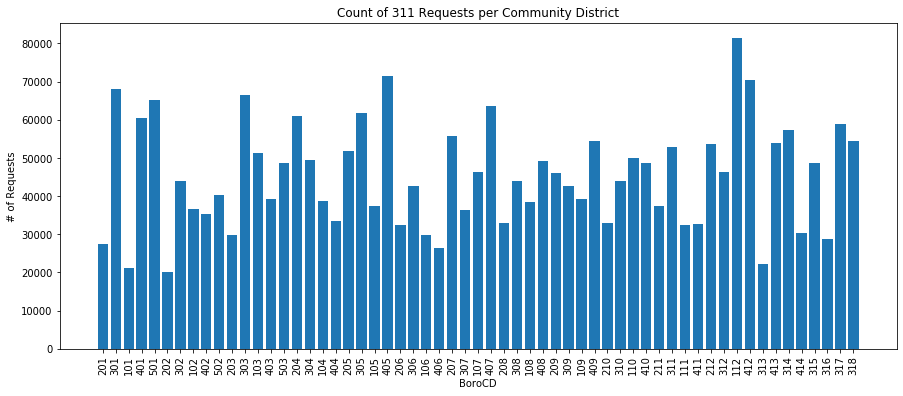

In [15]:
# we can improve the formatting of the plot, so you can read the x-axis labels

# create an array (essentially a list) of 0 though the length of cd_data. 
# this will be used to populate the x axis with all the ncessary bars.
position_on_x = np.arange(len(cd_data))

# set the figure size to be larger and wider
plt.figure(figsize=(15, 6))
# figsize=(width inches, height inches)

# create a bar chart with x = position_on_x and y = count_of_311_requests per borocd
plt.bar(position_on_x, cd_data.count_of_311_requests, align='center')
# width ranges from 0-1. 1 is the full width of the bar space, where all the bars will touch.

# label each bar with its borocd value
plt.xticks(position_on_x, cd_data.borocd, rotation=90) # rotate the label by 90 degrees

# labels for the chart title and axes
plt.title('Count of 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')

# show the plot once you've defined what it should include
plt.show()

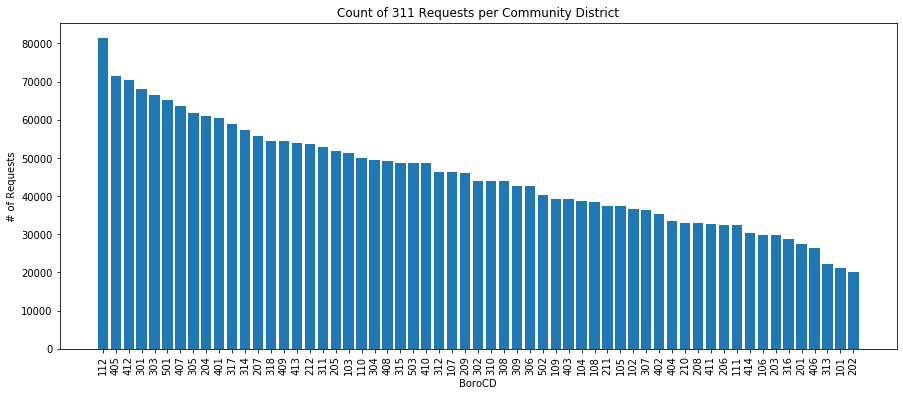

In [16]:
# now let's sort the counts from highest to lowest

position_on_x = np.arange(len(cd_data))

plt.figure(figsize=(15, 6))

# note: we need to sort the dataframe by count_of_311_requests before grabbing the column we want; 
# otherwise, the borocd values will get sorted incorrectly
plt.bar(position_on_x, cd_data.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests, align='center')
plt.xticks(position_on_x, cd_data.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')

plt.show()

## Creating a stacked bar chart

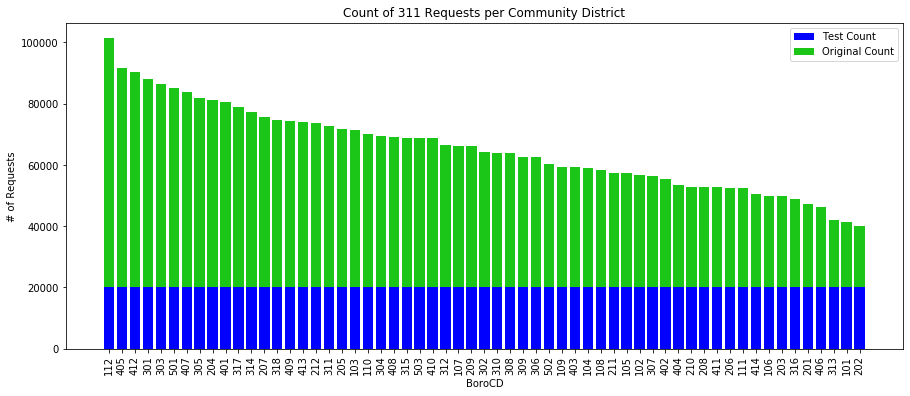

In [30]:
# list of bar positions on x axis
position_on_x = np.arange(len(cd_data))

# original set of counts data
# note: it's important to use np.array(series) to convert the pandas series into an array. 
# if you don't do this, the stacking won't work corectly
counts = np.array(cd_data.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)

# creating an array (aka list) of test data so we can easily visualize how the stacking works
test_counts = np.full(len(cd_data), 20000)

plt.figure(figsize=(15, 6))

# need to name the plots as objects in order to access their color attributes in the legend
plot1 = plt.bar(
  position_on_x,
  test_counts,
  align='center',
  color='blue',
  label='Test Count'
)
# the second plot gets rendered on top of the first
plot2 = plt.bar(
  position_on_x,
  counts,
  bottom=test_counts, 
  # bottom defines the starting number to which each y value will be added instead of starting at 0
  # the counts value will get added to the corresponding counts_plus_10000 value
  align='center',
  color='#1BC618',
  label='Original Count'
)

plt.xticks(position_on_x, cd_data.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')
plt.legend() # defaults to putting legend in top right

plt.show()

## Make a scatterplot of count of 311 requests per CD against CD population

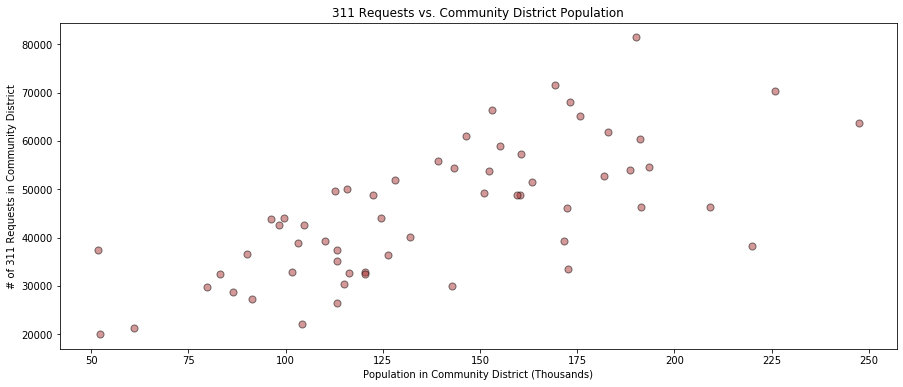

In [18]:
# define the data that will be used
x = np.array(cd_data['2010 Population']/1000)
y = np.array(cd_data.count_of_311_requests)

# define the styling of the scatter plot
color = '#a83232' # color of the circle. hex color picker: https://www.google.com/search?q=color+picker
area = 50 # area of the circle in pixels

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 
# s: size, c: color
# edgecolors: outline color of the marker
# alpha: transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

plt.show()

If you're curious about the marker size units: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size

## Let's try styling the scatter plot with different colors for each borough

In [19]:
# create a data subset for each borough

manhattan_cds = [ # one subset for all borocd records in manhattan.
  # we are creating a list of two lists. x = population in thousands
  [cd_data['2010 Population'][cd_data['Borough'] == 'Manhattan']/1000],
  # y = count of 311 requests
  [cd_data.count_of_311_requests[cd_data['Borough'] == 'Manhattan']]
]

bronx_cds = [
  [cd_data['2010 Population'][cd_data['Borough'] == 'Bronx']/1000],
  [cd_data.count_of_311_requests[cd_data['Borough'] == 'Bronx']]
]

brooklyn_cds = [
  [cd_data['2010 Population'][cd_data['Borough'] == 'Brooklyn']/1000],
  [cd_data.count_of_311_requests[cd_data['Borough'] == 'Brooklyn']]
]

queens_cds = [
  [cd_data['2010 Population'][cd_data['Borough'] == 'Queens']/1000],
  [cd_data.count_of_311_requests[cd_data['Borough'] == 'Queens']]
]

si_cds = [
  [cd_data['2010 Population'][cd_data['Borough'] == 'Staten Island']/1000],
  [cd_data.count_of_311_requests[cd_data['Borough'] == 'Staten Island']]
]

print(queens_cds)

[[3     191.105
8     113.200
13    171.576
18    172.598
22    169.190
26    113.257
30    247.354
34    151.107
38    143.317
42    122.396
46    116.431
50    225.919
52    188.593
54    114.978
Name: 2010 Population, dtype: float64], [3     60425
8     35238
13    39240
18    33501
22    71506
26    26407
30    63634
34    49221
38    54421
42    48707
46    32628
50    70361
52    54003
54    30350
Name: count_of_311_requests, dtype: int64]]


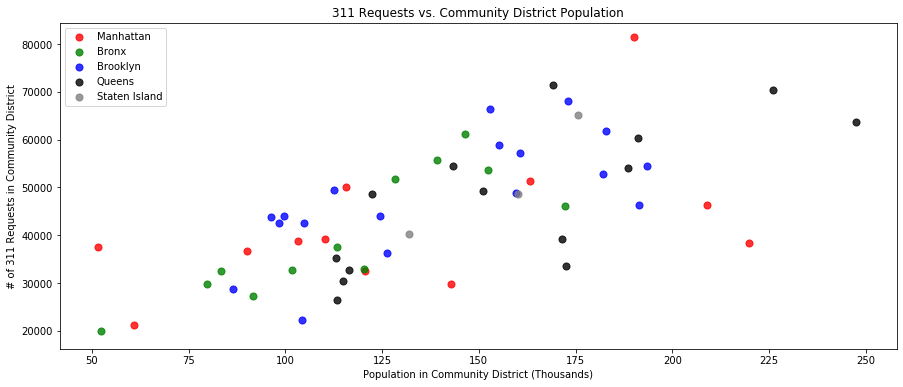

In [20]:
# define the color to be used for the markers for each data subset group
colors = ["red", "green", "blue", "black", "grey"]

# define the labels to be used for the data subset group
groups = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]

plt.figure(figsize=(15,6))

plt.scatter(
  manhattan_cds[0],
  manhattan_cds[1],
  alpha=0.8,
  c=colors[0],
  s=50,
  label=groups[0]
)
# each new plot gets rendered on top of the previous one
plt.scatter(
  bronx_cds[0],
  bronx_cds[1],
  alpha=0.8,
  c=colors[1],
  s=50,
  label=groups[1]
)
plt.scatter(
  brooklyn_cds[0],
  brooklyn_cds[1],
  alpha=0.8,
  c=colors[2],
  s=50,
  label=groups[2]
)
plt.scatter(
  queens_cds[0],
  queens_cds[1],
  alpha=0.8,
  c=colors[3],
  s=50,
  label=groups[3]
)
plt.scatter(
  si_cds[0],
  si_cds[1],
  alpha=0.8,
  c=colors[4],
  s=50,
  label=groups[4]
)

plt.title('311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

# add legend at specified location
# loc=1 top right
# loc=2 top left
# loc=3 bottom left
# loc=4 bottom right
plt.legend(loc=2)

plt.show()

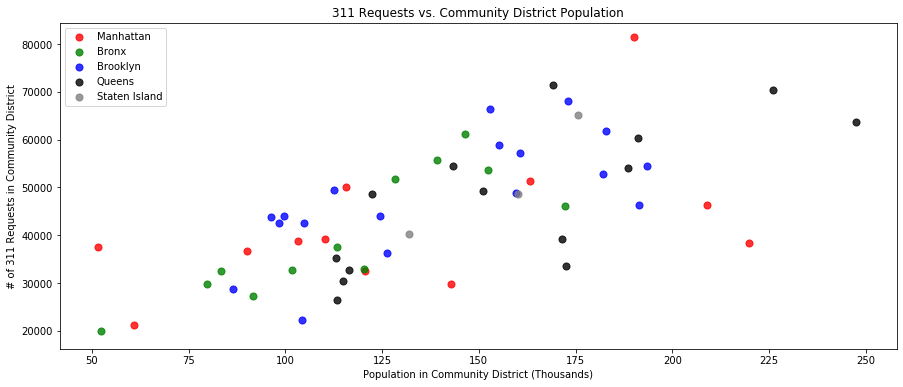

In [21]:
# save the lists of data as one big list of lists, "data_per_cd"
data_per_cd = [manhattan_cds, bronx_cds, brooklyn_cds, queens_cds, si_cds]

# define the color to be used for the markers for each data subset group
colors = ["red", "green", "blue", "black", "grey"]

# define the labels to be used for the data subset group
groups = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]

plt.figure(figsize=(15,6))

# create a for loop that adds a scatterplot to the figure for each data subset group
for data, color, group in zip(data_per_cd, colors, groups): 
  x, y = data
  plt.scatter(x, y, alpha=0.8, c=color, s=50, label=group)

plt.title('311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

# add legend at specified location
# loc=1 top right
# loc=2 top left
# loc=3 bottom left
# loc=4 bottom right
plt.legend(loc=2)

plt.show()

More info on zip() https://www.w3schools.com/python/ref_func_zip.asp

Good reference for scatterplots: https://pythonspot.com/matplotlib-scatterplot/

## Histogram of CDs by population size range

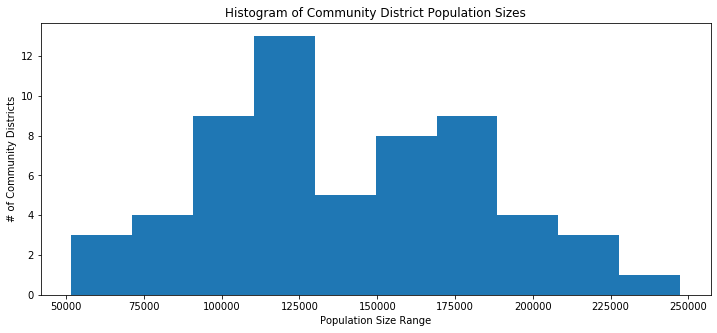

In [22]:
plt.figure(figsize=(12, 5))

# create a histogram using CD population size
plt.hist(cd_data['2010 Population'], bins=10)

# labels for the chart title and axes
plt.title('Histogram of Community District Population Sizes')
plt.xlabel('Population Size Range')
plt.ylabel('# of Community Districts')

# show the plot once you've defined what it should include
plt.show()

## Bonus: Produce a map of complaint counts by CD

In [23]:
# first we need to install geopandas, a library that lets us open and map spatial data files
pip install geopandas

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 10.1MB 25.5MB/s 
     |████████████████████████████████| 11.8MB 197kB/s 


In [ ]:
# after installing, you still need to import the package into your notebook
import geopandas as gpd

In [25]:
# Read in shapefile hosted on Google Drive using Geopandas
# Original data source on NYC Planning's website: https://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page
gdf = gpd.read_file('/content/drive/My Drive/Data for Python/nycd_19c/nycd.shp')
gdf.head()

,BoroCD,Shape_Leng,Shape_Area,geometry
0,311,51549.557306,1.031778e+08,"POLYGON ((991748.394 161084.955, 991860.956 16..."
1,313,65821.875531,8.819569e+07,"POLYGON ((988770.762 156350.512, 988958.229 15..."
2,312,52245.830194,9.952550e+07,"POLYGON ((992187.408 175455.468, 992239.079 17..."
3,304,37008.100085,5.666322e+07,"POLYGON ((1012965.523 187886.950, 1012949.003 ..."
4,206,35875.711802,4.266431e+07,"POLYGON ((1019707.979 246708.141, 1019688.551 ..."


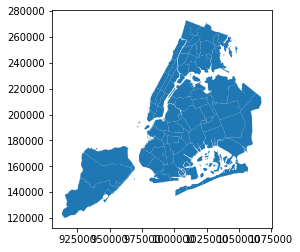

In [26]:
gdf.plot()

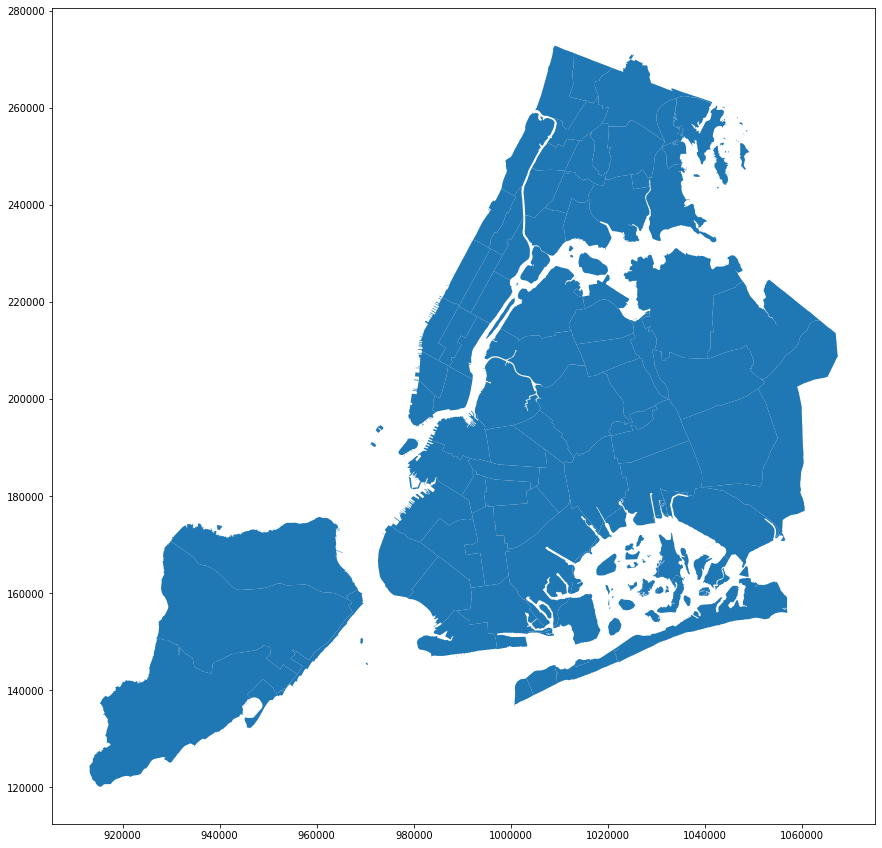

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
gdf.plot(ax=ax)

In [28]:
# join the cd_data with the 311 request counts and population size onto gdf
# note: this is going to give us an error because the columns have different data types

merged_data = pd.merge(left=gdf, right=cd_data, left_on='BoroCD', right_on='borocd')
merged_data.head()

ValueError: ignored

In [ ]:
# convert all the integers in the BoroCD column to strings

gdf.BoroCD = gdf.BoroCD.apply(str)

In [ ]:
# join the cd_data with the 311 request counts and population size onto gdf

merged_data = pd.merge(left=gdf, right=cd_data, left_on='BoroCD', right_on='borocd')
merged_data.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

merged_data.plot(
    column='count_of_311_requests',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Number of 311 Requests per Community District",'orientation': "horizontal"})

# by default, it will produce a chloropleth map with the highest value in yellow and lowest value in dark purple

More guidance on mapping with Geopandas: http://geopandas.org/mapping.html

Good reference on subplots: https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

# HOMEWORK 3 Coding: Analyzing and visualizing specific categories of 311 complaints

Please refer to the [HW 4 Starter Notebook](https://github.com/afeld/nyu-python-public-policy/blob/master/hw_3_starter.ipynb). You can open it in Google Colab and save a copy to your own Google Drive where you can edit the notebook and use it for your homework submission. Step 1 has been done for you. Please complete Step 2 and Step 3.

# HOMEWORK 3 Tutorial: Using python packages to perform statistical analysis

[Simple and Multiple Linear Regression in Python](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9). Ignore the reference to needing to install Anaconda. That's only relevant if you're running python on your computer instead of in a cloud notebook. `statsmodels.api` and `sklearn` are already installed in the Colab environment, so you just need to `import` them